In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [72]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [74]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## Data cleaning

In [75]:
df.isna().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [76]:
df = df.drop(['Pool QC', 'PID', '2nd Flr SF','Fence', 'Misc Feature', 'Fireplace Qu', 'Alley'], axis=1)


In [77]:
df.dropna(inplace=True)

In [78]:
df.isna().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 74, dtype: int64

In [79]:
df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,...,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.00000,2218.000000
mean,56.654644,69.626240,9782.795311,6.221821,5.587015,1972.275473,1985.190712,107.014427,450.664563,50.246619,...,94.125789,47.884581,22.761497,2.495942,17.045987,2.377818,43.516231,6.224527,2007.77908,186051.732191
std,42.428148,23.342377,6521.082042,1.397669,1.063544,30.902415,21.043079,185.329729,466.422465,167.978906,...,122.885236,66.177896,64.252226,25.242017,57.636267,35.881511,516.872599,2.725627,1.32492,83428.752016
min,20.000000,21.000000,1300.000000,2.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.00000,12789.000000
25%,20.000000,59.000000,7382.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.00000,131500.000000
50%,50.000000,69.000000,9360.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,375.000000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.00000,163500.000000
75%,70.000000,80.000000,11309.500000,7.000000,6.000000,2003.000000,2005.000000,172.000000,737.750000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.00000,217500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,870.000000,570.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.00000,755000.000000


<AxesSubplot:xlabel='Roof Style', ylabel='SalePrice'>

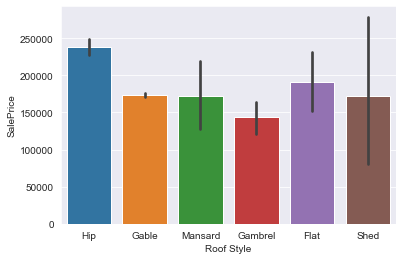

In [80]:
sns.barplot(x='Roof Style',y='SalePrice',data=df)

In [81]:
df


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,20,RL,80.0,17400,Pave,Reg,Low,AllPub,Inside,Mod,...,0,0,0,0,0,5,2006,WD,Normal,160000
2924,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,131000
2925,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2928,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


## Data Preprocessing

In [82]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',

In [83]:
df = pd.get_dummies(df, columns=['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Functional', 'Kitchen Qual', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition'])



In [84]:
df

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,20,80.0,17400,5,5,1977,1977,0.0,936.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2924,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2925,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2928,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,0,1,0,0,0,0,1,0


In [86]:
X = df.drop(['SalePrice'], axis = 1)
y = df.SalePrice

In [87]:
import pandas as pd
import numpy as np

skewed_features = X.apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features = skewed_features[skewed_features > skew_threshold]

# Apply the log transformation to the skewed features
for feature in skewed_features.index:
    X[feature] = np.log1p(X[feature])

# Now, the skewed features have been transformed to reduce skewness


In [88]:
X

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.044522,4.955827,10.366309,6,1.791759,1960,1960,4.727388,6.461468,0.000000,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
1,3.044522,4.394449,9.360741,5,1.945910,1961,1961,0.000000,6.150603,4.976734,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
2,3.044522,4.406719,9.565775,6,1.945910,1958,1958,4.691348,6.828712,0.000000,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
3,3.044522,4.543295,9.320181,7,1.791759,1968,1968,0.000000,6.971669,0.000000,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
4,4.110874,4.317488,9.534668,5,1.791759,1997,1998,0.000000,6.674561,0.000000,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,3.044522,4.394449,9.764283,5,1.791759,1977,1977,0.000000,6.842683,0.000000,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
2924,3.044522,5.081404,9.903538,5,2.079442,1960,1996,0.000000,7.110696,0.000000,...,0.0,0.0,0.0,1,0.693359,0.0,0.0,0.0,0,0.0
2925,4.394449,3.637586,8.979417,6,1.945910,1984,1984,0.000000,6.709304,0.000000,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
2928,3.044522,4.356709,9.211440,5,1.791759,1974,1975,0.000000,6.977281,4.820282,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0


In [89]:


from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your dataset
scaler = StandardScaler()

# Fit the scaler on your data and transform it
data = scaler.fit_transform(X)

# The 'df_scaled' variable now contains the standardized data


In [90]:
X

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.044522,4.955827,10.366309,6,1.791759,1960,1960,4.727388,6.461468,0.000000,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
1,3.044522,4.394449,9.360741,5,1.945910,1961,1961,0.000000,6.150603,4.976734,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
2,3.044522,4.406719,9.565775,6,1.945910,1958,1958,4.691348,6.828712,0.000000,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
3,3.044522,4.543295,9.320181,7,1.791759,1968,1968,0.000000,6.971669,0.000000,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
4,4.110874,4.317488,9.534668,5,1.791759,1997,1998,0.000000,6.674561,0.000000,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,3.044522,4.394449,9.764283,5,1.791759,1977,1977,0.000000,6.842683,0.000000,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
2924,3.044522,5.081404,9.903538,5,2.079442,1960,1996,0.000000,7.110696,0.000000,...,0.0,0.0,0.0,1,0.693359,0.0,0.0,0.0,0,0.0
2925,4.394449,3.637586,8.979417,6,1.945910,1984,1984,0.000000,6.709304,0.000000,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0
2928,3.044522,4.356709,9.211440,5,1.791759,1974,1975,0.000000,6.977281,4.820282,...,0.0,0.0,0.0,1,0.000000,0.0,0.0,0.0,1,0.0


In [91]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your feature matrix and 'y' contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
linear = LinearRegression()

In [94]:
linear.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred= linear.predict(X_test)

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 753924493.0511092
Mean Absolute Error: 18116.5357873935
R-squared (R2) Score: 0.8993809729211991


In [114]:
test=X.head(1)
test

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,3.044522,4.955827,10.366309,6,1.791759,1960,1960,4.727388,6.461468,0.0,...,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0


In [118]:
y.head(1)

0    215000
Name: SalePrice, dtype: int64

In [115]:
PREDICTION = linear.predict(test)

In [116]:
PREDICTION

array([232384.46126097])